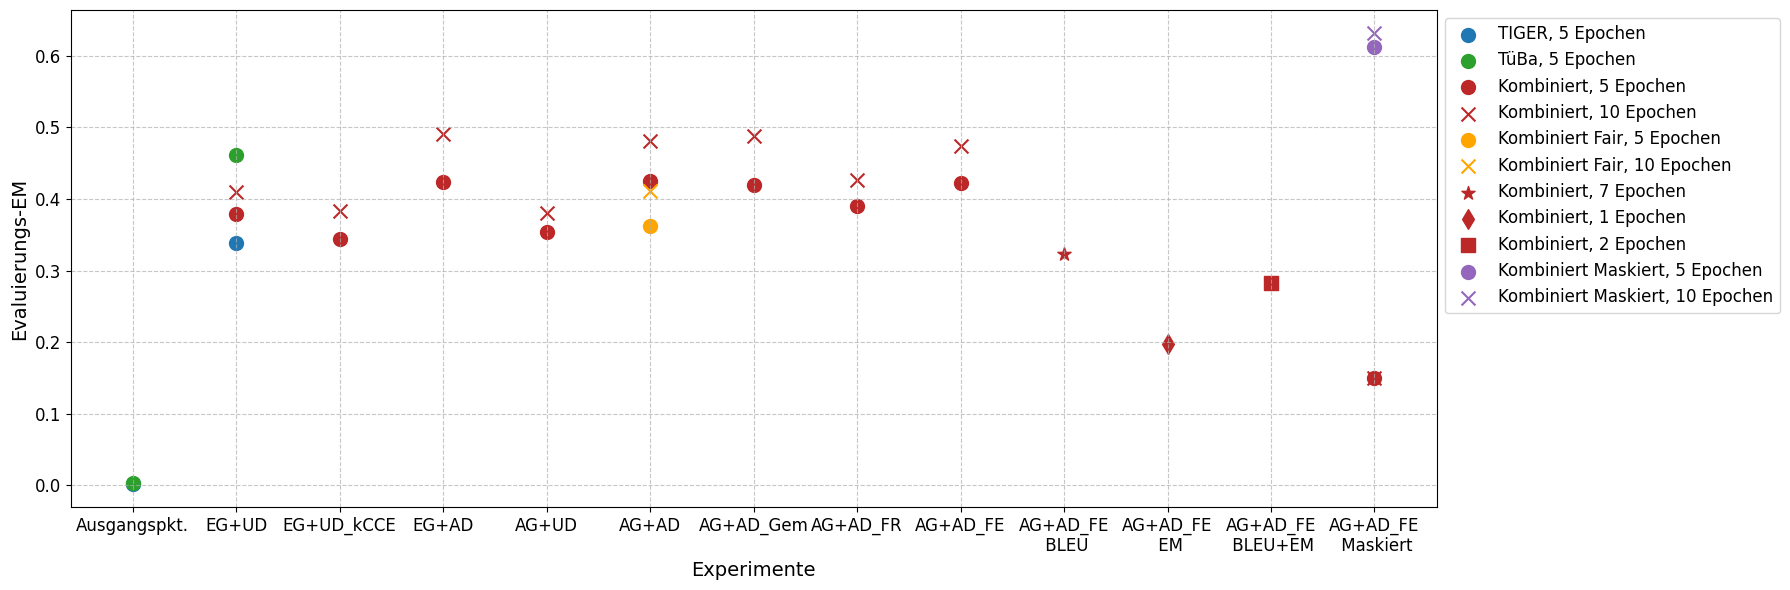

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#                   0            1      2              3        4       5
experiments = ['Ausgangspkt.', 'EG+UD', 'EG+UD_kCCE', 'EG+AD', 'AG+UD', 'AG+AD', 'AG+AD_Gem', 'AG+AD_FR', 'AG+AD_FE', 'AG+AD_FE\n BLEU', 'AG+AD_FE\n EM', 'AG+AD_FE\n BLEU+EM', 'AG+AD_FE\n Maskiert']  # Kategorien auf der x-Achse
#       6             7           8               9               10  
#     11                   12

epochs = [5, 10, 7, 1, 2]

#               0       1       2               3               4
datasets = ['TIGER', 'TüBa', 'Kombiniert', 'Kombiniert Fair', 'Kombiniert Maskiert']  # Datensatzinformationen

# Daten in der angegebenen Form (Werte werden durch Indizes ausgewählt)
 #                (Wert, Experiments, Epochs, Datasets)
DataTrainBLEU = [
                (.8224,      0,          0,     2), 
                (.8976,      1,          0,     2),
                (.9067,      1,          1,     2),
                (.8903,      2,          0,     2), 
                (.9022,      2,          1,     2),
                (.9243,      3,          0,     2),
                (.9285,      3,          1,     2),
                (.8914,      4,          0,     2),
                (.8908,      4,          1,     2),
                (.9032,      5,          0,     2),
                (.9037,      5,          1,     2),
                (.9043,      6,          0,     2),
                (.9032,      6,          1,     2),
                (.8901,      7,          0,     2),
                (.9038,      7,          1,     2),
                (.8946,      8,          0,     2),
                (.8989,      8,          1,     2),
                (.9043,      9,          2,     2),
                (.9028,      11,         4,     2)
]

DataEvalBLEU = [
                (.7151,      0,          0,     0),
                (.8183,      0,          0,     1),  
                (.8676,      1,          0,     0),
                (.9030,      1,          0,     1),
                (.8823,      1,          0,     2),
                (.8925,      1,          1,     2),
                (.8700,      2,          0,     2), 
                (.8841,      2,          1,     2),
                (.8828,      3,          0,     2),
                (.9087,      3,          1,     2),
                (.8703,      4,          0,     2),
                (.8801,      4,          1,     2),
                (.8938,      5,          0,     2),
                (.9119,      5,          1,     2),
                (.8748,      5,          0,     3),
                (.8899,      5,          1,     3),
                (.8923,      6,          0,     2),
                (.9153,      6,          1,     2),
                (.8782,      7,          0,     2),
                (.8956,      7,          1,     2),
                (.8991,      8,          0,     2),
                (.9129,      8,          1,     2),
                (.9104,      9,          2,     2),
                (.8701,      10,         3,     2),
                (.8952,      11,         4,     2),
                (.8513,      12,         0,     4),
                (.8520,      12,         1,     4),
                (.8085,      12,         0,     2),
                (.8082,      12,         1,     2),
]

DataEvalEM = [
                (.0013,      0,          0,     0),
                (.0028,      0,          0,     1),  
                (.3392,      1,          0,     0),
                (.4611,      1,          0,     1),
                (.3792,      1,          0,     2),
                (.4102,      1,          1,     2),
                (.3437,      2,          0,     2), 
                (.3838,      2,          1,     2),
                (.4239,      3,          0,     2),
                (.4913,      3,          1,     2),
                (.3537,      4,          0,     2),
                (.3810,      4,          1,     2),
                (.4257,      5,          0,     2),
                (.4813,      5,          1,     2),
                (.3629,      5,          0,     3),
                (.4110,      5,          1,     3),
                (.4193,      6,          0,     2),
                (.4877,      6,          1,     2),
                (.3902,      7,          0,     2),
                (.4266,      7,          1,     2),
                (.4229,      8,          0,     2),
                (.4740,      8,          1,     2),
                (.3236,      9,          2,     2),
                (.1969,      10,         3,     2),
                (.2829,      11,         4,     2),
                (.6129,      12,         0,     4),
                (.6326,      12,         1,     4),
                (.1495,      12,         0,     2),
                (.1504,      12,         1,     2),
]

Data = DataEvalEM

# Marker und Farben definieren
colors = {'TIGER': (0.1216, 0.4667, 0.7059), 'TüBa': (0.1725, 0.6275, 0.1725), 'Kombiniert': (0.7392, 0.1529, 0.1569), 'Kombiniert Fair': 'orange', 'Kombiniert Maskiert': 'tab:purple'}
markers = {5: 'o', 10: 'x', 7: '*', 1: 'd', 2: 's'}

# Plot erstellen
plt.figure(figsize=(18, 6))
for value, exp_idx, epoch_idx, dataset_idx in Data:
    plt.scatter(
        experiments[exp_idx],          # x-Wert (Kategorie aus der Liste Experiments)
        value,                         # y-Wert
        color=colors[datasets[dataset_idx]],  # Farbe basierend auf dem Datensatz
        marker=markers[epochs[epoch_idx]],    # Marker basierend auf der Anzahl Epochen
        s=100,                         # Größe der Punkte
        label=f"{datasets[dataset_idx]}, {epochs[epoch_idx]} Epochen" if (dataset_idx, epoch_idx) not in [(d[3], d[2]) for d in Data[:Data.index((value, exp_idx, epoch_idx, dataset_idx))]] else ""
    )

# Achsentitel und Beschriftungen
plt.xlabel('Experimente', fontsize=14)
plt.ylabel('Evaluierungs-EM', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legende hinzufügen
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Entfernt doppelte Labels
plt.legend(by_label.values(), by_label.keys(), loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)

# Diagramm anzeigen
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

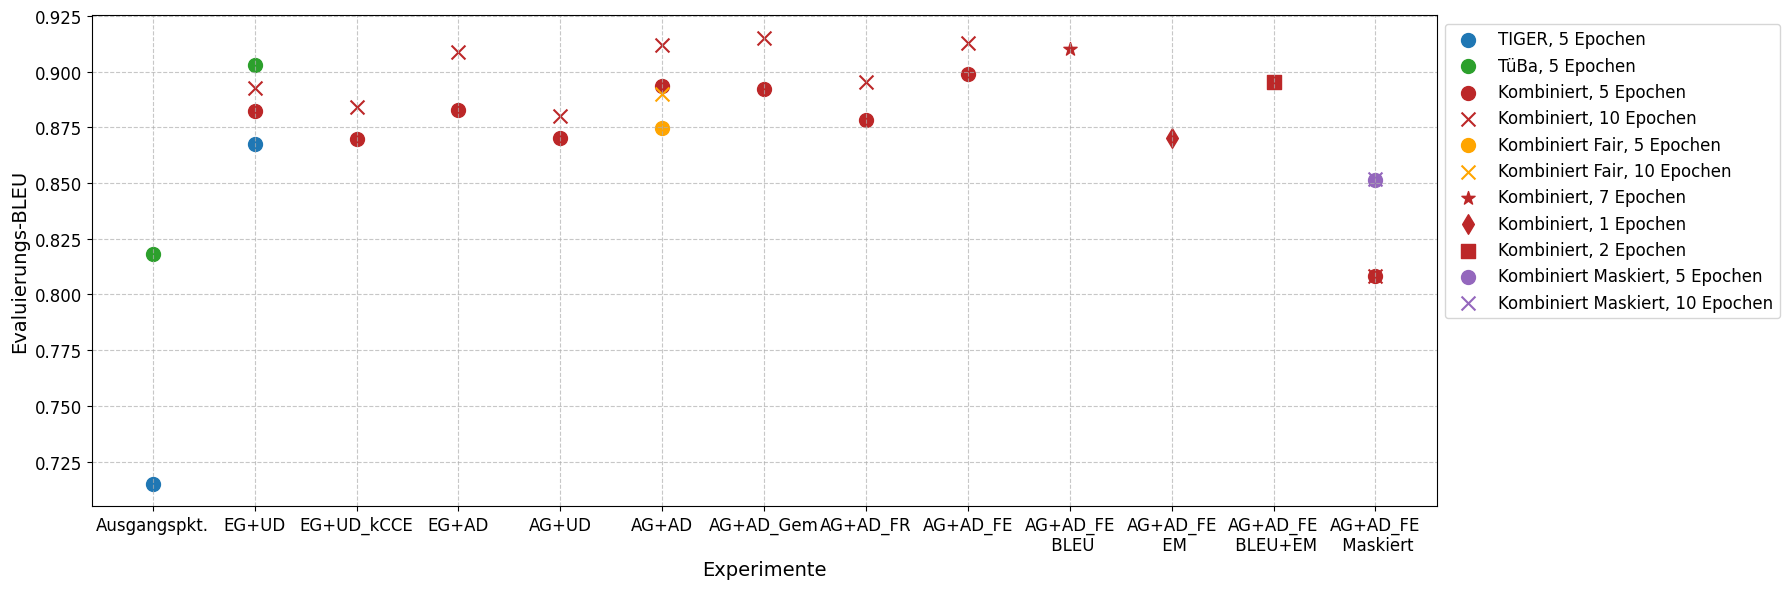

In [20]:
Data = DataEvalBLEU

# Marker und Farben definieren
colors = {'TIGER': (0.1216, 0.4667, 0.7059), 'TüBa': (0.1725, 0.6275, 0.1725), 'Kombiniert': (0.7392, 0.1529, 0.1569), 'Kombiniert Fair': 'orange', 'Kombiniert Maskiert': 'tab:purple'}
markers = {5: 'o', 10: 'x', 7: '*', 1: 'd', 2: 's'}

# Plot erstellen
plt.figure(figsize=(18, 6))
for value, exp_idx, epoch_idx, dataset_idx in Data:
    plt.scatter(
        experiments[exp_idx],          # x-Wert (Kategorie aus der Liste Experiments)
        value,                         # y-Wert
        color=colors[datasets[dataset_idx]],  # Farbe basierend auf dem Datensatz
        marker=markers[epochs[epoch_idx]],    # Marker basierend auf der Anzahl Epochen
        s=100,                         # Größe der Punkte
        label=f"{datasets[dataset_idx]}, {epochs[epoch_idx]} Epochen" if (dataset_idx, epoch_idx) not in [(d[3], d[2]) for d in Data[:Data.index((value, exp_idx, epoch_idx, dataset_idx))]] else ""
    )

# Achsentitel und Beschriftungen
plt.xlabel('Experimente', fontsize=14)
plt.ylabel('Evaluierungs-BLEU', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legende hinzufügen
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Entfernt doppelte Labels
plt.legend(by_label.values(), by_label.keys(), loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)

# Diagramm anzeigen
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

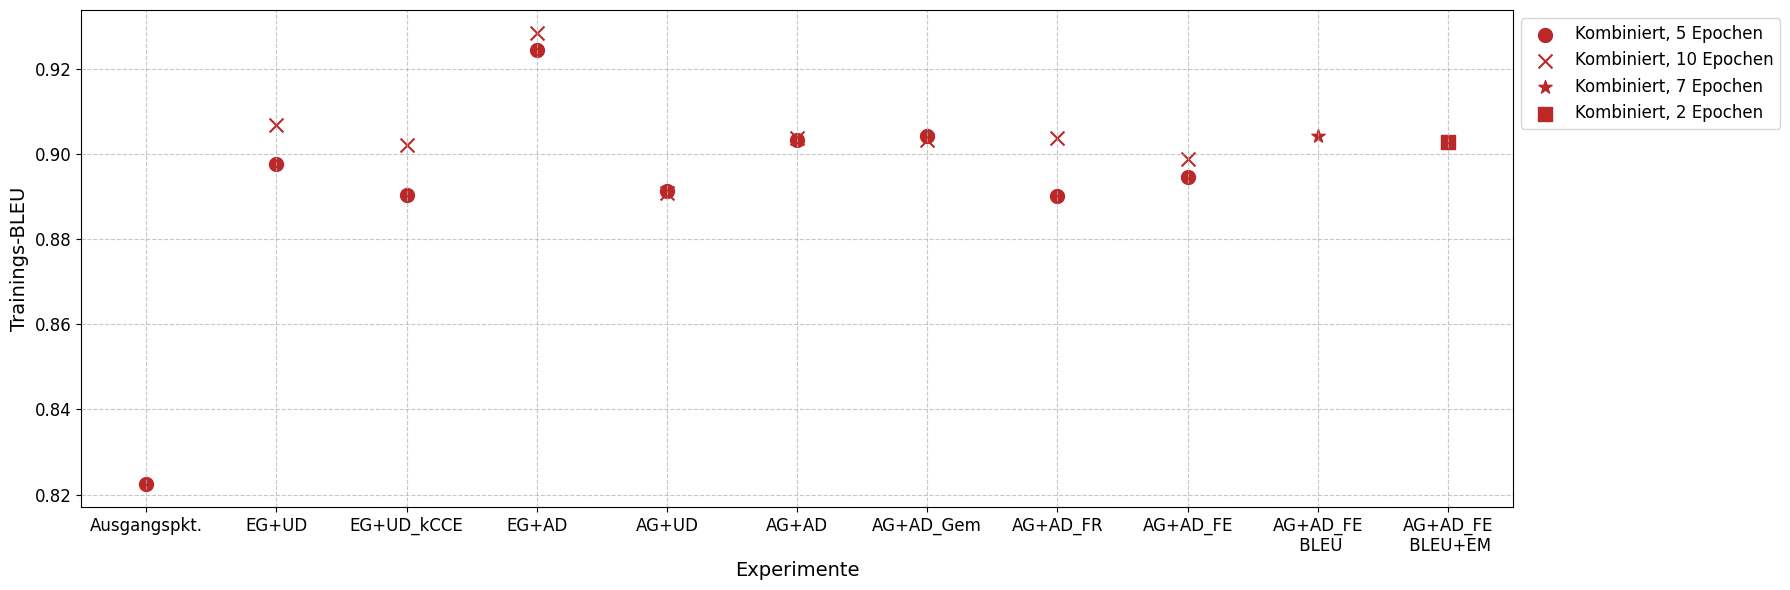

In [22]:
Data = DataTrainBLEU

# Marker und Farben definieren
colors = {'TIGER': (0.1216, 0.4667, 0.7059), 'TüBa': (0.1725, 0.6275, 0.1725), 'Kombiniert': (0.7392, 0.1529, 0.1569), 'Kombiniert Fair': 'orange', 'Kombiniert Maskiert': 'tab:purple'}
markers = {5: 'o', 10: 'x', 7: '*', 1: 'd', 2: 's'}

# Plot erstellen
plt.figure(figsize=(18, 6))
for value, exp_idx, epoch_idx, dataset_idx in Data:
    plt.scatter(
        experiments[exp_idx],          # x-Wert (Kategorie aus der Liste Experiments)
        value,                         # y-Wert
        color=colors[datasets[dataset_idx]],  # Farbe basierend auf dem Datensatz
        marker=markers[epochs[epoch_idx]],    # Marker basierend auf der Anzahl Epochen
        s=100,                         # Größe der Punkte
        label=f"{datasets[dataset_idx]}, {epochs[epoch_idx]} Epochen" if (dataset_idx, epoch_idx) not in [(d[3], d[2]) for d in Data[:Data.index((value, exp_idx, epoch_idx, dataset_idx))]] else ""
    )

# Achsentitel und Beschriftungen
plt.xlabel('Experimente', fontsize=14)
plt.ylabel('Trainings-BLEU', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legende hinzufügen
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Entfernt doppelte Labels
plt.legend(by_label.values(), by_label.keys(), loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)

# Diagramm anzeigen
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()